In [1]:
"""
 Basic data set generation
 Sungjoon Choi (sungjoon.choi@cpslab.snu.ac.kr)
"""
# Import packs
import numpy as np
import tensorflow as tf
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import pandas
import skimage.io
import skimage.transform

%matplotlib inline  

print ("Package loaded")

Package loaded


In [2]:
# Print Current Folder 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) )

Current folder is /home/enginius/notebooks


In [3]:
"""
 This is acutally all you need to do! 
"""
# Training set folder 
paths = {"images/cats", "images/dogs"}
# The reshape size
imgsize = [30, 30]

"""
 This is acutally all you need to do! 
"""

'\n This is acutally all you need to do! \n'

In [4]:
# First, check the total number of training data
"""
 The reason for doing this a priori is that
 it is better to pre-allocate memory rather than
 dynamically adjust the size of the matrix. 
"""
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt = 0
nclass = len(paths)
for relpath in paths:
    fullpath = cwd + "/" + relpath
    flist = os.listdir(fullpath)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(fullpath, f)
        imgcnt = imgcnt + 1

print ("Number of total images is %d" % (imgcnt))

Number of total images is 87


In [13]:
# Then, let's save them! 
# Grayscale
def rgb2gray(rgb):
    if len(currimg.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Current Image if GRAY!")
        return rgb
totalimg   = np.ndarray((imgcnt, imgsize[0]*imgsize[1]))
totallabel = np.ndarray((imgcnt, nclass))
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        currimg  = imread(fullpath)
        # Convert to grayscale 
        grayimg  = rgb2gray(currimg)
        # Reshape
        graysmall = imresize(grayimg, [imgsize[0], imgsize[1]])/255.
        grayvec   = np.reshape(graysmall, (1, -1))
        # Save 
        totalimg[imgcnt, :] = grayvec
        totallabel[imgcnt, :] = np.eye(nclass, nclass)[i]
        imgcnt    = imgcnt + 1

In [6]:
# Divide total data into training and test set
randidx  = np.random.randint(imgcnt, size=imgcnt)
trainidx = randidx[0:int(4*imgcnt/5)]
testidx  = randidx[int(4*imgcnt/5):imgcnt]

trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]

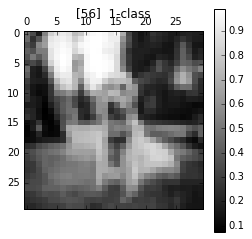

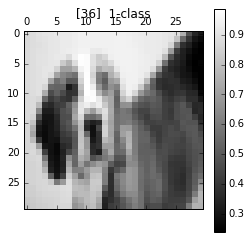

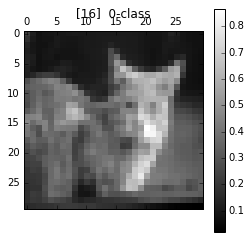

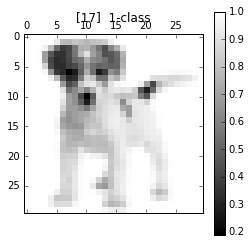

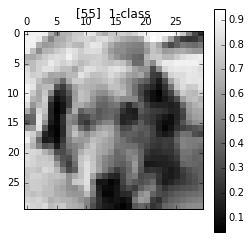

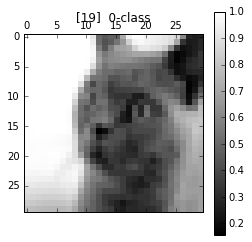

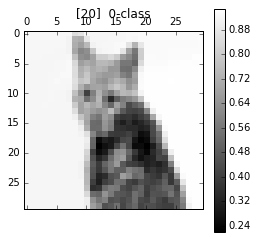

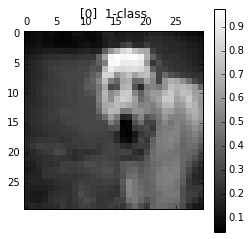

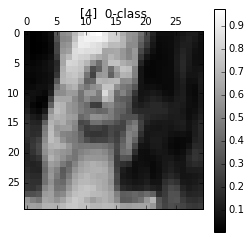

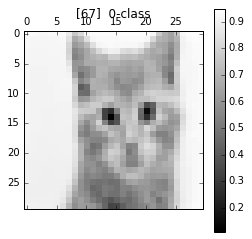

In [7]:
# Plot them all 
# This code can be used for mini-batch learning! 
ntrain = trainimg.shape[0]
batch_size = 10;
randidx = np.random.randint(ntrain, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    
    plt.matshow(currimg, cmap=plt.get_cmap('gray'))
    plt.colorbar()
    plt.title("[" + str(i) + "]  " + str(currlabel) + "-class") 
    plt.show() 

In [8]:
# Save them! 
savepath = cwd + "/data/trainingset.npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
         , testimg=testimg, testlabel=testlabel)

In [9]:
# Load them!
loadpath = cwd + "/data/trainingset.npz"
l = np.load(loadpath)

# See what's in here
l.files

['testimg', 'trainlabel', 'testlabel', 'trainimg']

In [10]:
# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))

69 train images loaded
18 test images loaded


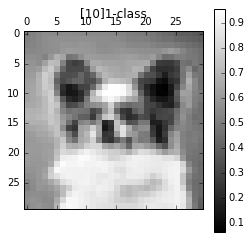

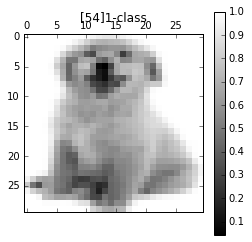

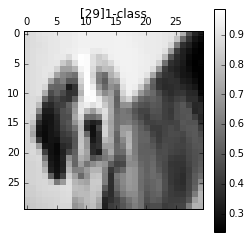

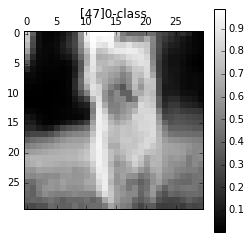

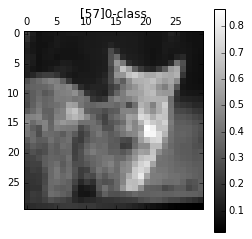

In [11]:
# Do batch stuff using loaded data 
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 5;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    
    plt.matshow(currimg, cmap=plt.get_cmap('gray'))
    plt.colorbar()
    plt.title("[" + str(i) + "]" + str(currlabel) + "-class") 
    plt.show() 

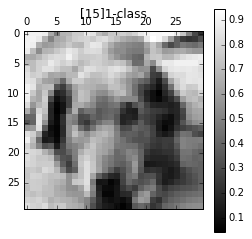

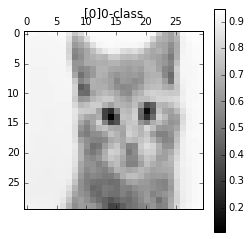

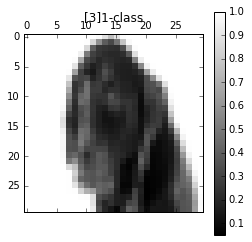

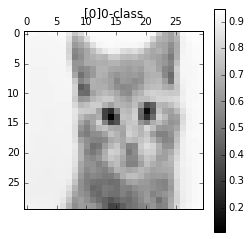

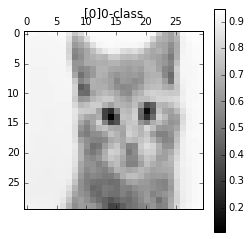

In [12]:
# Do batch stuff using loaded data 
ntest_loaded = testimg_loaded.shape[0]
batch_size = 5;
randidx = np.random.randint(ntest_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(testimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = testlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    
    plt.matshow(currimg, cmap=plt.get_cmap('gray'))
    plt.colorbar()
    plt.title("[" + str(i) + "]" + str(currlabel) + "-class") 
    plt.show() 